In [80]:
import os
import cv2
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from multiprocessing import Pool
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler




In [81]:
from skimage.feature import hog
import os
import cv2

labels = ['sad', 'happy', 'neutral', 'surprise', 'angry']
data_train = []
target_train = []
data_test = []
target_test = []

folders = ['train', 'test']

for folder in folders:
    for label in labels:
        # DONT FORGET TO CHANGE THE PATH 
        for file in os.listdir(f'C:\\Users\\omara\\OneDrive\\Documents\\GitHub\\ML-Regression-Classification\\data\\image_dataset\\{folder}\\{label}'): 
            img = cv2.imread(f'C:\\Users\\omara\\OneDrive\\Documents\\GitHub\\ML-Regression-Classification\\data\\image_dataset\\{folder}\\{label}\\{file}', 0)  # load image in grayscale
            if img is not None:
                # Extract HOG features
                features, hog_image = hog(image=img, block_norm='L2', orientations=10, pixels_per_cell=(8, 8),
                                          cells_per_block=(2, 2), visualize=True)

                if folder == 'train':
                    data_train.append(features)
                    target_train.append(label)
                else:
                    data_test.append(features)
                    target_test.append(label)


In [82]:
x_train = np.array(data_train)
y_train = np.array(target_train)
X_test = np.array(data_test)
y_test = np.array(target_test)

In [83]:
# Create a Logistic Regression model
model = LogisticRegression(max_iter=1000, C=1.0 , random_state=42)


# Fit the model to the scaled training data
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [84]:
from sklearn.metrics import accuracy_score

# Predict the labels of the test data
y_pred = model.predict(X_test)

# Print the validation accuracy
validation_accuracy = accuracy_score(y_test, y_pred)
print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')

# Calculate and print the training accuracy
training_accuracy = model.score(x_train, target_train)
print(f'Training accuracy: {training_accuracy * 100:.2f}%')

Validation Accuracy: 52.56%
Training accuracy: 57.60%


# Step 1: Load the images and their labels

In [ ]:
from skimage.feature import hog

labels = ['sad', 'happy', 'neutral', 'surprise', 'angry']
data = []
target = []

# def process_file(file):
#     img = cv2.imread(file, 0)  # load image in grayscale
#     if img is not None:
#         # Extract HOG features
#         features, hog_image = hog(image=img, orientations=8, pixels_per_cell=(4, 4),
#                 cells_per_block=(2, 2), visualize=True)
#         return features

# if __name__ == '__main__':
#     with Pool(os.cpu_count()) as p:
#         for label in labels:
#             files = [f'C:\\Users\\oyoun\\OneDrive\\Desktop\\COLLEGE\\3rd Year\\1st Semister\\ML\\Project\\Code\\data\\image_dataset\\train\\{label}\\{file}' for file in os.listdir(f'C:\\Users\\oyoun\\OneDrive\\Desktop\\COLLEGE\\3rd Year\\1st Semister\\ML\\Project\\Code\\data\\image_dataset\\train\\{label}')]
#             results = p.map(process_file, files)
#             data.extend(results)
#             target.extend([label]*len(results))

for label in labels:
    for file in os.listdir(f'C:\\Users\\oyoun\\OneDrive\\Desktop\\COLLEGE\\3rd Year\\1st Semister\\ML\\Project\\Code\\data\\image_dataset\\train\\{label}'):
        img = cv2.imread(f'C:\\Users\\oyoun\\OneDrive\\Desktop\\COLLEGE\\3rd Year\\1st Semister\\ML\\Project\\Code\\data\\image_dataset\\train\\{label}\\{file}', 0)  # load image in grayscale
        if img is not None:
            # Resize the image to a standard size (optional but recommended)
            # img = cv2.resize(img, (64, 64))
            
            # Extract HOG features
            features, hog_image = hog(image=img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True)
            
            data.append(features)
            target.append(label)

# Preprocessing

In [ ]:
# data = [cv2.resize(img, (48, 48)) for img in data]  # resize
data = np.array(data)  # normalize
target = np.array(target)
# Step 3: Flatten the images
# data = data.reshape((data.shape[0], -1))

# Splitting Dataset

In [ ]:
#######
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)


# Training

In [ ]:
# Scale the data
# print(data)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)



model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

# Prediction

In [ ]:
y_pred = model.predict(X_test)
print(f'Validation Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')
training_accuracy = model.score(X_train, y_train)
print(f'Training accuracy: {training_accuracy * 100:.2f}%')

Validation Accuracy: 51.45%
Training accuracy: 56.46%


Confusion Matrix (Test Set):
[[ 245  174  157  162   63]
 [  85 1086  103  119   44]
 [ 107  213  457  168   58]
 [ 135  236  222  348   44]
 [  46   97   66   49  352]]


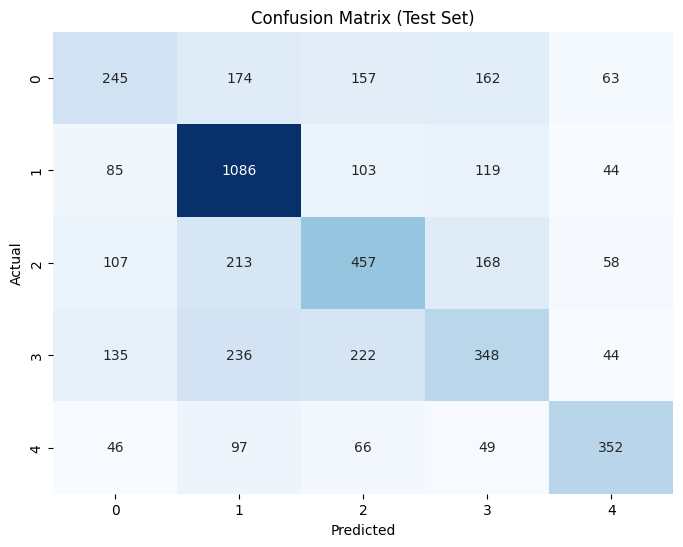

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

#Confusion Matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Test Set):")
print(conf_matrix_test)

#Plot Confusion Matrix for test set using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

